In [1]:
import os
import pickle
os.getcwd()
os.chdir("../../")

import numpy as np
from matplotlib import pyplot as plt

In [2]:
cwd = os.getcwd()
model_path = os.path.join(cwd, "models", "train_2.pickle")
with open(model_path, 'rb') as f:
    model = pickle.load(f)

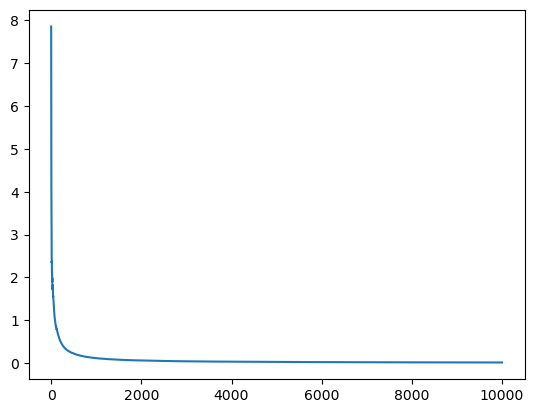

In [3]:
plt.plot(model.get_mse())

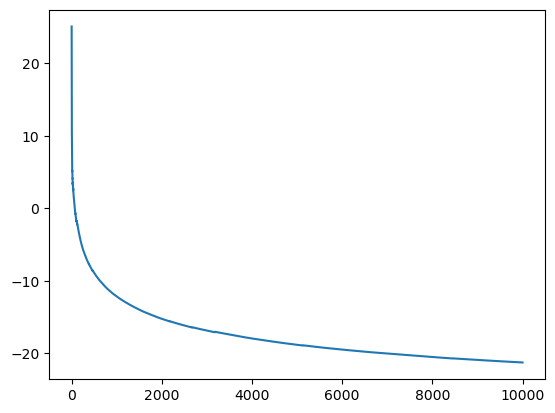

In [4]:
plt.plot(model.get_mnll())

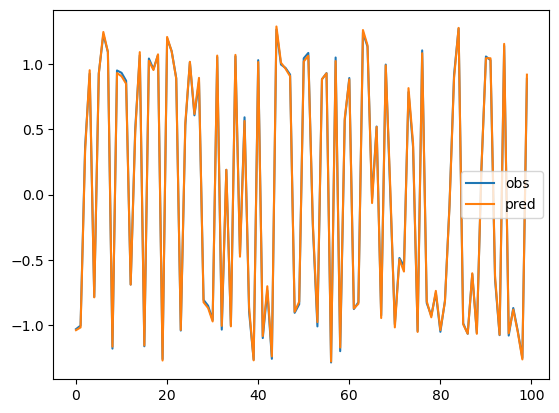

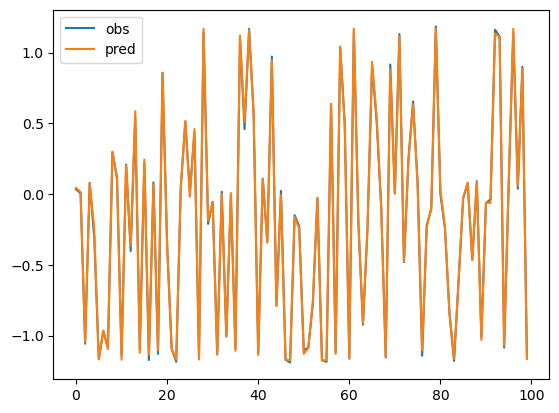

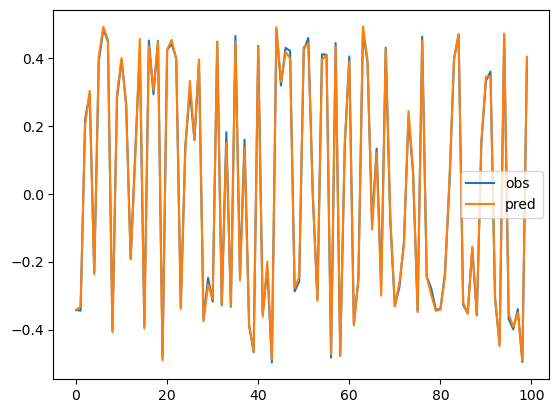

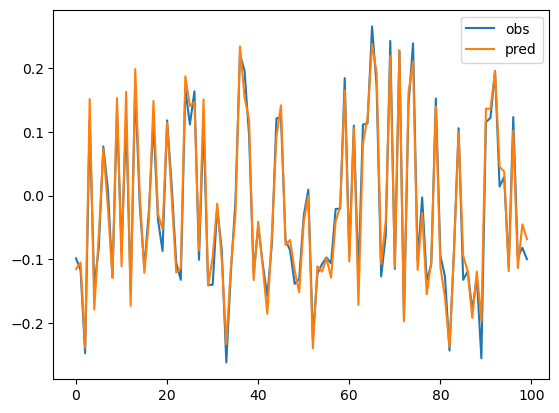

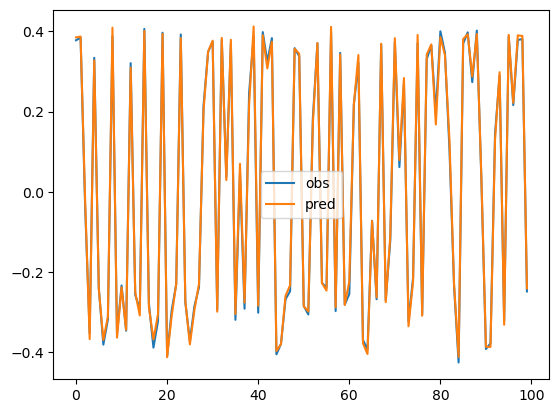

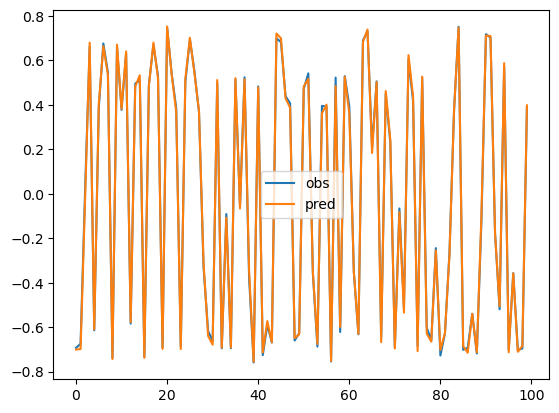

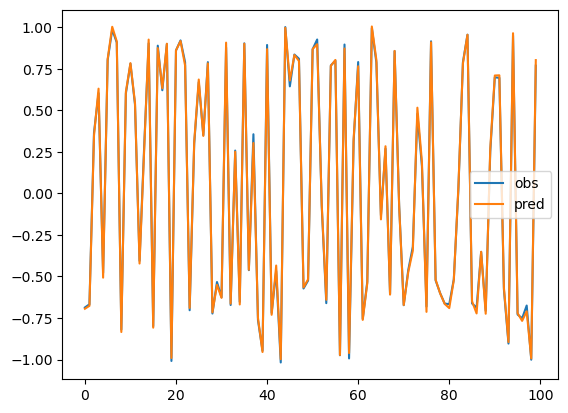

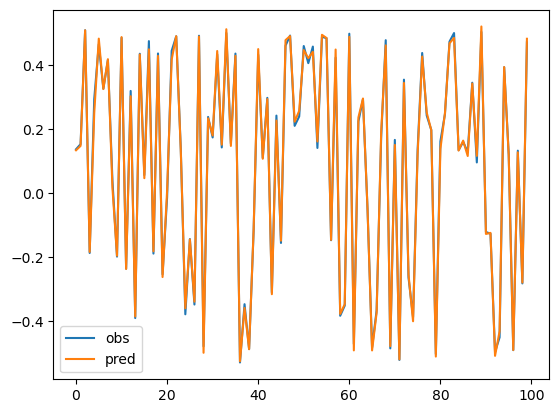

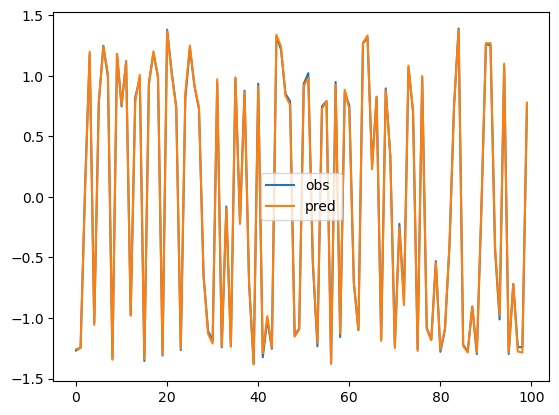

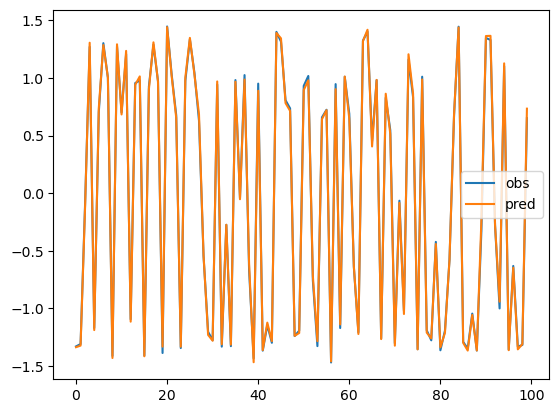

In [5]:
pred = model.get_predictions()
obs = model.get_observations()

for d in range(10):
    start = -101
    end = start +100
    plt.plot(obs[start:end,d], label='obs')
    plt.plot(pred[start:end,d], label='pred')
    plt.legend()
    plt.show()

In [6]:
X_est = model.get_estimated_states()[0]
X_act = model.get_actual_states()[0]

In [7]:
model.get_estimated_states()

[array([[-0.002461  ,  0.0098784 ],
        [-0.00574942,  0.0045691 ],
        [ 0.01435028, -0.00198849],
        ...,
        [-0.00488744,  0.00135662],
        [ 0.00211633, -0.00110919],
        [ 0.00036431,  0.00183088]]),
 array([[-0.00656113,  0.00687296],
        [ 0.11727943,  0.10060459],
        [ 0.08182621,  0.03787968],
        ...,
        [-0.10081226,  0.00230893],
        [-0.04007009,  0.00309108],
        [ 0.07906182,  0.04990975]])]

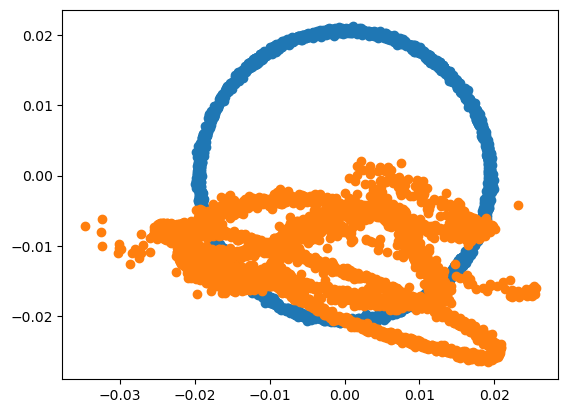

In [12]:
svd_dict = model.get_svd_representation(5000)
U = svd_dict["actual_svd_representation"][0]
U_est = svd_dict["estimated_svd_representation"][1]
plt.scatter(U[:, 0], U[:, 1], label='actual hidden states')
plt.scatter(U_est[:, 0], U_est[:, 1], label='estimated hidden states')
plt.show()

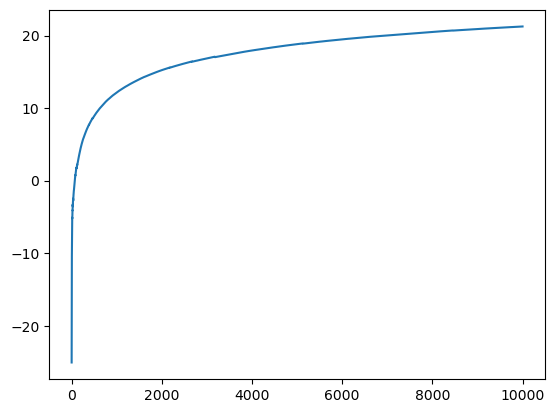

In [9]:
ll = model.get_log_likelihoods()
plt.plot(np.cumsum(ll) / np.arange(1, len(ll) + 1))

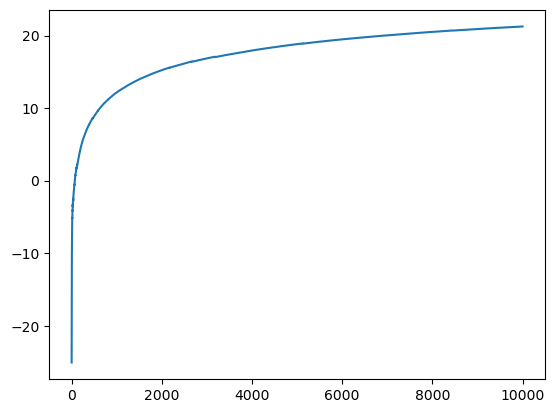

In [10]:
ll = model.get_log_likelihoods_forward()
plt.plot(np.cumsum(ll) / np.arange(1, len(ll) + 1))